In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
path_to_data = '../session12/vgsales.csv'
df = pd.read_csv(path_to_data, index_col='Rank')
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
from pandas import plotting

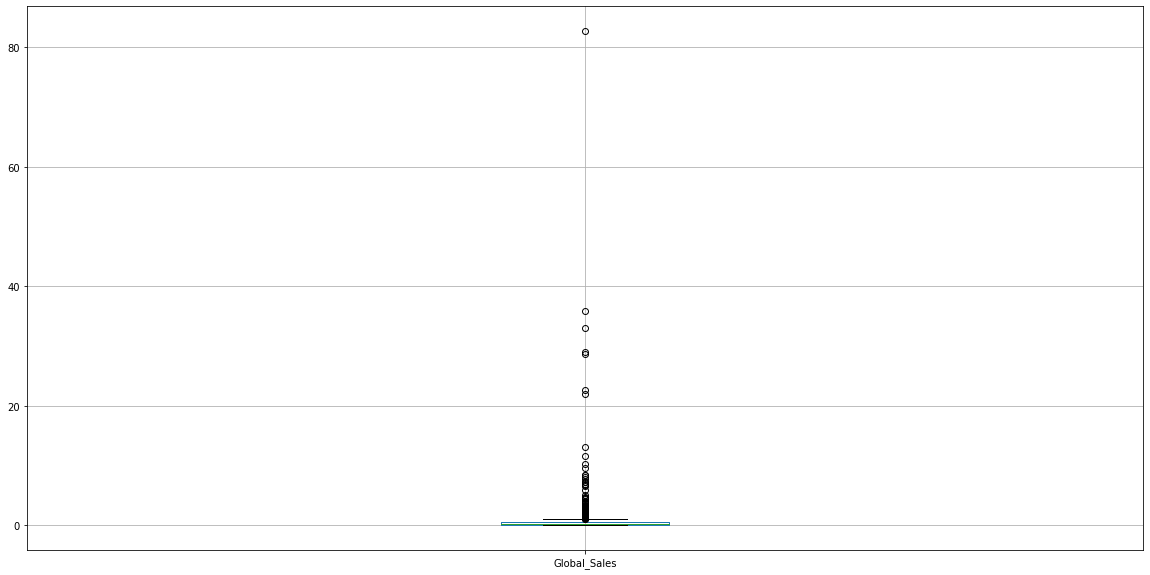

In [5]:
plt.figure(figsize=(20, 10))
df1 = df[df['Platform'] == 'Wii']
df1.boxplot(column='Global_Sales')

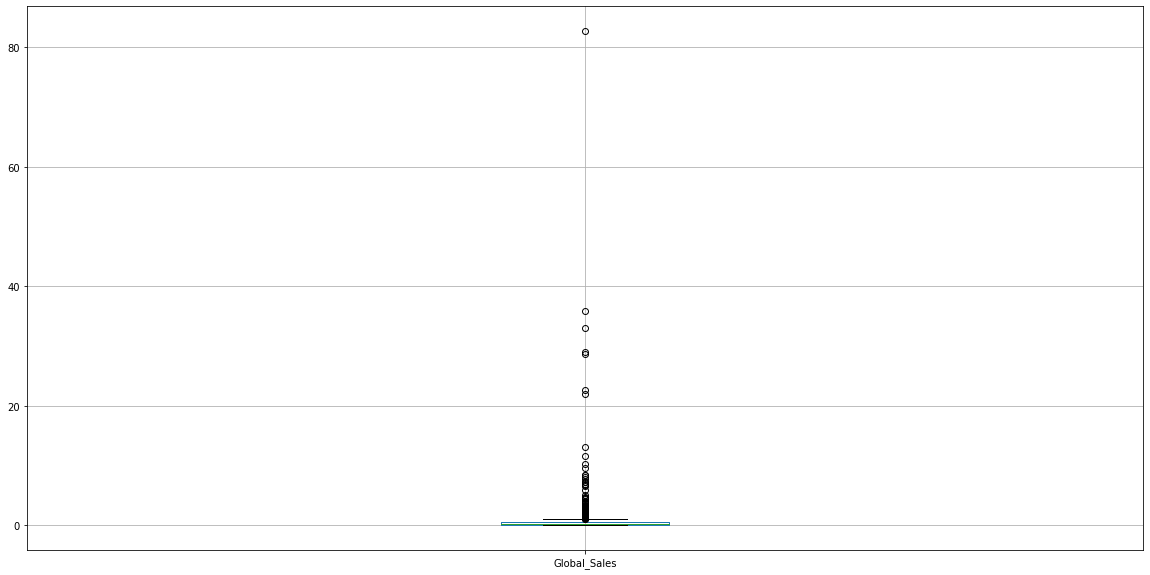

In [52]:
plt.figure(figsize=(20, 10))
df2 = df[(df['Platform'] == 'Wii') & (df['Global_Sales'] < 100)]
df2.boxplot(column='Global_Sales')
plt.show()

<Figure size 1440x720 with 0 Axes>

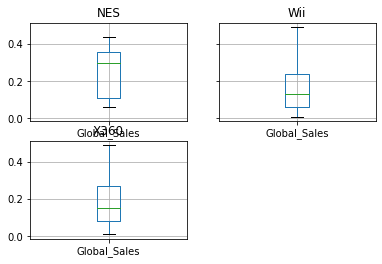

In [29]:
plt.figure(figsize=(20, 10))
df2 = df[((df['Platform'] == 'Wii') | (df['Platform'] == 'NES') | (df['Platform'] == 'X360')) & (df['Global_Sales'] < 0.5)]
df2.groupby('Platform').boxplot(column='Global_Sales')
plt.show()

In [24]:
df['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

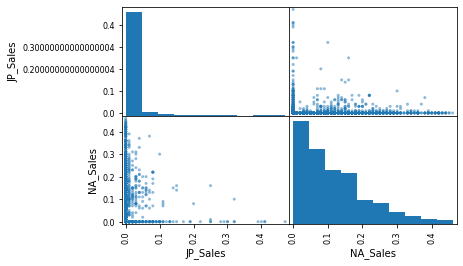

In [33]:
plotting.scatter_matrix(df2[['JP_Sales', 'NA_Sales']])
plt.show()

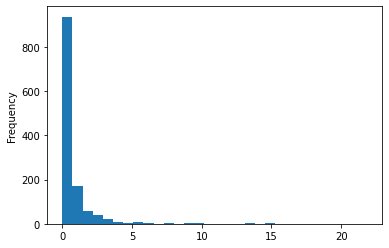

In [41]:
df[df['Platform'] == 'X360']['Global_Sales'].plot(kind='hist', bins=30)

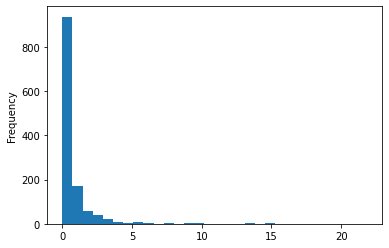

In [45]:
df[(df['Platform'] == 'X360') & (df['Global_Sales'] < 200)]['Global_Sales'].plot(kind='hist', bins=30)

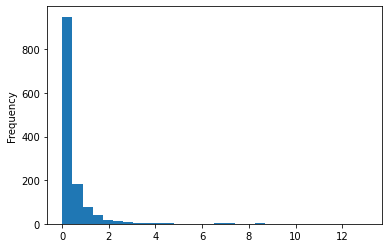

In [90]:
df[(df['Platform'] == 'Wii') & (df['Global_Sales'] < 20)]['Global_Sales'].plot(kind='hist', bins=30)

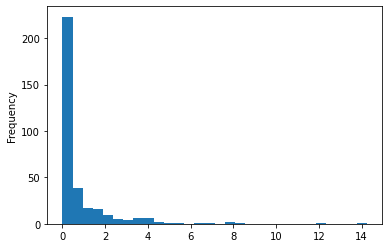

In [47]:
df[(df['Platform'] == 'PS4') & (df['Global_Sales'] < 200)]['Global_Sales'].plot(kind='hist', bins=30)

In [50]:
df[df['Global_Sales'] > 15]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62


In [55]:
from scipy import stats
import numpy as np

In [95]:
xbox = df[df['Platform'] == 'X360']['Global_Sales']
stats.ttest_1samp(xbox, 0.77)

Ttest_1sampResult(statistic=0.10264095181184665, pvalue=0.9182642203579319)

In [96]:
np.mean(xbox)

0.7746719367588929

In [97]:
nintendo = df[df['Platform'] == 'Wii']['Global_Sales']
stats.ttest_ind(xbox, nintendo)

Ttest_indResult(statistic=0.7617780851785225, pvalue=0.44626187486792557)

In [98]:
ps4 = df[df['Platform'] == 'PS4']['Global_Sales']
stats.ttest_ind(xbox, ps4)

Ttest_indResult(statistic=-0.533487863528139, pvalue=0.5937700550376881)

In [99]:
stats.ttest_ind(nintendo, ps4)

Ttest_indResult(statistic=-0.7251036469349873, pvalue=0.4684907065319286)

In [100]:
print('PS4 %s; X360: %s; Wii: %s' % (np.mean(ps4), np.mean(xbox), np.mean(nintendo)))

PS4 0.8276785714285696; X360: 0.7746719367588929; Wii: 0.6994037735849035


In [101]:
print('PS4: %s; X360: %s; Wii: %s' % (np.std(ps4), np.std(xbox), np.std(nintendo)))

PS4: 1.6165547849900264; X360: 1.6182656721487862; Wii: 3.136871152222571


<Figure size 1440x720 with 0 Axes>

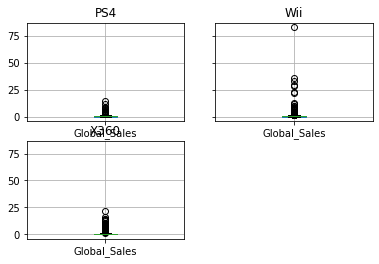

In [102]:
plt.figure(figsize=(20, 10))
df2 = df[((df['Platform'] == 'Wii') | (df['Platform'] == 'PS4') | (df['Platform'] == 'X360'))]
df2.groupby('Platform').boxplot(column='Global_Sales')
plt.show()

<Figure size 1440x720 with 0 Axes>

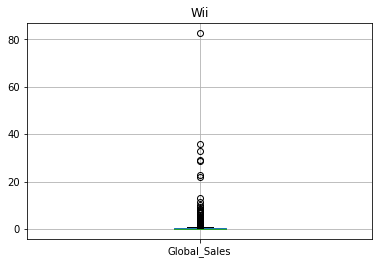

In [85]:
plt.figure(figsize=(20, 10))
df2 = df[df['Platform'] == 'Wii']
df2.groupby('Platform').boxplot(column='Global_Sales')
plt.show()

<Figure size 1440x720 with 0 Axes>

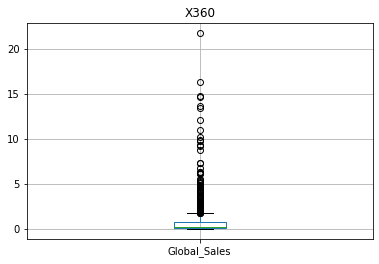

In [87]:
plt.figure(figsize=(20, 10))
df2 = df[df['Platform'] == 'X360']
df2.groupby('Platform').boxplot(column='Global_Sales')
plt.show()

<Figure size 1440x720 with 0 Axes>

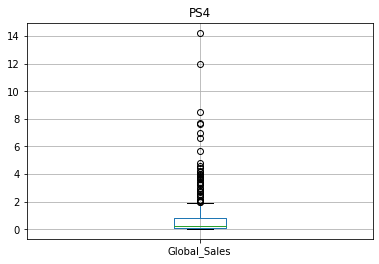

In [88]:
plt.figure(figsize=(20, 10))
df2 = df[df['Platform'] == 'PS4']
df2.groupby('Platform').boxplot(column='Global_Sales')
plt.show()

In [6]:
df2 = df.groupby(['Year', 'Genre', 'Platform']).count()
df2.boxplot()